In [1]:
import numpy as np 
import pandas as pd 


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
#Hidden layer #3 perceptrons
model.add(Dense(11,activation='relu',input_dim=11)) 
#  Hidden layer with 11 nodes connected to input layer having 11 columns
model.add(Dense(11,activation='relu'))#  Hidden layer with 11 nodes
model.add(Dense(1,activation='sigmoid'))#  Hidden layer with 1 node

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.5453 - accuracy: 0.7559 - val_loss: 0.4771 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7975 - val_loss: 0.4551 - val_accuracy: 0.8012
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4431 - accuracy: 0.8028 - val_loss: 0.4430 - val_accuracy: 0.8044
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8095 - val_loss: 0.4357 - val_accuracy: 0.8081
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8181 - val_loss: 0.4298 - val_accuracy: 0.8144
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8216 - val_loss: 0.4246 - val_accuracy: 0.8244
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8270 - val_loss: 0.4198 - val_accuracy: 0.8263

In [17]:
model.layers[0].get_weights() #Weights of input layer

[array([[-0.2085926 , -0.09434029,  0.4458471 , -0.23125266,  0.0063808 ,
         -0.06565967, -0.05861059,  0.43885598, -0.19227676,  0.07676777,
         -0.03109451],
        [-0.4684566 ,  0.19774282, -0.9052316 ,  1.4593197 ,  0.03624059,
          0.70678806, -0.18854536, -0.66248953, -1.3372641 , -0.12543608,
          0.751384  ],
        [ 0.04335243, -0.040879  , -0.2753937 , -0.22882594,  0.20194346,
          0.03681863, -0.11698519, -0.00218586,  0.04143553,  0.06908151,
          0.05629444],
        [-0.19857451,  0.1863063 ,  0.04892474,  0.03529371, -0.72380984,
         -0.3067312 ,  0.07862662, -0.1395231 ,  0.13120216, -0.90384895,
         -0.10554085],
        [-0.01103703,  0.42160466,  0.08105853, -0.05508734, -0.26600736,
         -0.36738458,  0.52346236, -0.2762143 ,  0.10309488, -1.2653937 ,
          1.1110953 ],
        [-0.41773537,  0.4536244 , -0.3147907 , -0.12661766,  0.3037461 ,
         -0.14120501, -0.18455899,  0.06425647, -0.01575917, -0.18775  

In [18]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 3ms/step


In [19]:
y_pred

array([[0.21793252],
       [0.2947657 ],
       [0.17550702],
       ...,
       [0.21713664],
       [0.15159762],
       [0.21249638]], dtype=float32)

In [25]:
#y_pred = y_pred.argmax(axis=-1)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8565

In [27]:
history.history   #contains loss, accuracy, val loss, val accuracy for all epochs


{'loss': [0.5453310608863831,
  0.46379196643829346,
  0.4431261718273163,
  0.4307008385658264,
  0.42233917117118835,
  0.41563481092453003,
  0.4089638888835907,
  0.40331095457077026,
  0.398197740316391,
  0.39115846157073975,
  0.3805310130119324,
  0.3661680221557617,
  0.3549916744232178,
  0.34752732515335083,
  0.3440503776073456,
  0.3418141305446625,
  0.3398411273956299,
  0.33878570795059204,
  0.33789998292922974,
  0.3367895483970642,
  0.3361395001411438,
  0.33581408858299255,
  0.3349146246910095,
  0.3340545892715454,
  0.3336722254753113,
  0.333200603723526,
  0.33291614055633545,
  0.3323347866535187,
  0.3317583501338959,
  0.3308766484260559,
  0.33084988594055176,
  0.33021923899650574,
  0.3300643563270569,
  0.32994717359542847,
  0.32964321970939636,
  0.32848888635635376,
  0.32802924513816833,
  0.3281829357147217,
  0.32742464542388916,
  0.3272116780281067,
  0.32654234766960144,
  0.3266385793685913,
  0.3255852162837982,
  0.3255269527435303,
  0.3258

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred) 
print(cm)
accuracy_score(y_test, y_pred) 

[[1500   95]
 [ 192  213]]


0.8565

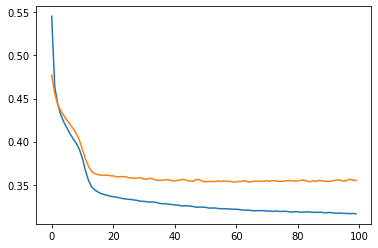

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

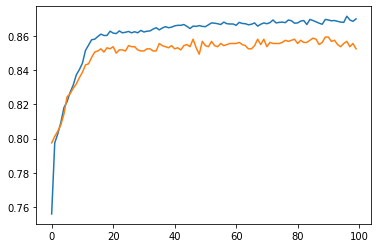

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])